### KONLPY 사용

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pydub import AudioSegment
from konlpy.tag import Okt

In [3]:
# 형태소 분석기 초기화
okt = Okt()

# 오디오 파일 길이 계산
def get_audio_length(file_path):
    audio = AudioSegment.from_mp3(file_path)
    return len(audio) / 1000  # milliseconds to seconds

# 텍스트 파일에서 형태소 분석을 통한 토큰(형태소) 개수 반환
def get_morpheme_count(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    morphemes = okt.morphs(text)  # 형태소 분석기를 사용하여 토큰화
    return len(morphemes)  # 형태소 개수를 반환

# 분당 형태소 개수 계산
def calculate_morphemes_per_minute(audio_length, morpheme_count):
    minutes = audio_length / 60
    return morpheme_count / minutes if minutes > 0 else 0

# 데이터 수집
audio_folder = 'ebs_audio_combined_1~45'
text_folder = 'ebs_audio_combined_1~45_txt'

data = []

for i in range(1, 4
               ):
    audio_file = os.path.join(audio_folder, f'{i:02d}강_combined.mp3')
    text_file = os.path.join(text_folder, f'{i:02d}강_combined_transcription.txt')
    
    audio_length = get_audio_length(audio_file)
    morpheme_count = get_morpheme_count(text_file)  # 형태소 수 계산
    morphemes_per_minute = calculate_morphemes_per_minute(audio_length, morpheme_count)
    
    data.append(morphemes_per_minute)



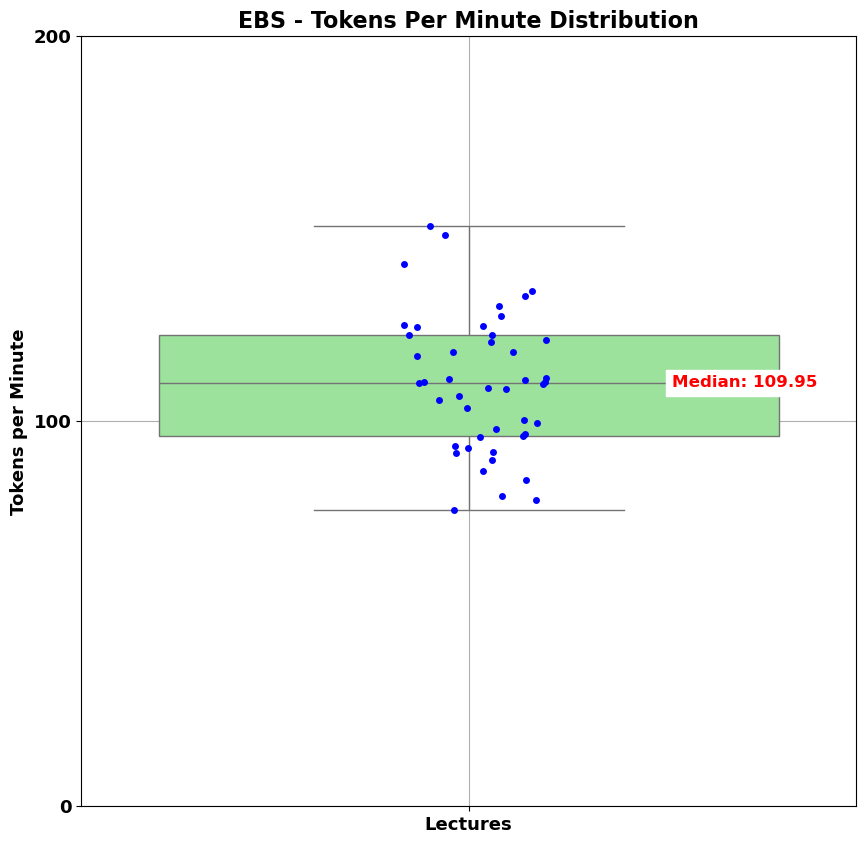

In [4]:
# 중앙값 계산
median = np.median(data)

# 박스플롯 및 스트립플롯 생성
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=data, orient='v', color='lightgreen')  # 세로 방향 박스플롯
sns.stripplot(data=data, orient='v', color='blue', jitter=True)  # 세로 방향 스트립플롯

plt.title('EBS - Tokens Per Minute Distribution', fontsize=16, fontweight='bold')
plt.xlabel('')  # x축에 'Lecture' 레이블 추가
plt.ylabel('Tokens per Minute', fontweight='bold', fontsize=13)  # y축에 'Characters/Minute' 레이블 추가

# y축 스케일을 특정 값으로 설정
plt.yticks([0, 100, 200], fontweight='bold', fontsize=13)
plt.xticks([0], ['Lectures'], fontweight='bold', fontsize=13)  # 단일 데이터 세트이므로 x축에 하나의 레이블만 추가

# 중앙값을 오른쪽 가운데에 표시
plt.text(0.95, 0.55, f'Median: {median:.2f}', color='red', ha='right', va='center', 
         fontweight='bold', fontsize=12, transform=ax.transAxes, backgroundcolor='white')

plt.grid(True)
plt.show()


## NLTK 사용

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


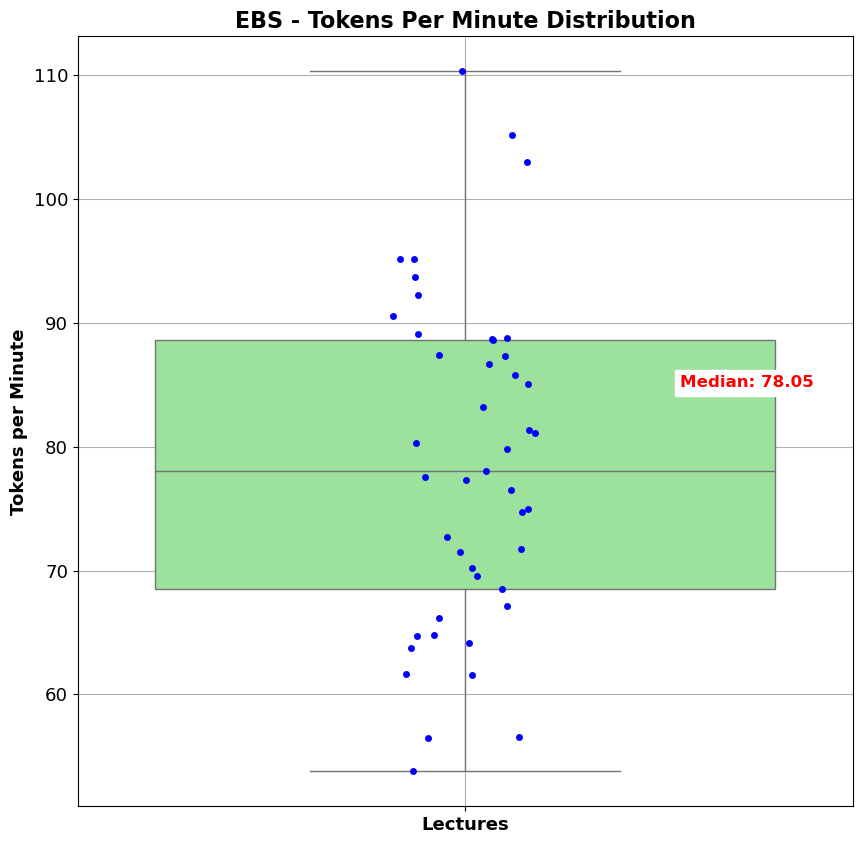

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydub import AudioSegment
import nltk

# NLTK 토크나이저 다운로드
nltk.download('punkt')

# 오디오 파일 길이 계산
def get_audio_length(file_path):
    audio = AudioSegment.from_mp3(file_path)
    return len(audio) / 1000  # milliseconds to seconds

# 텍스트 파일에서 토큰 개수 반환 (NLTK 사용)
def get_token_count(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    tokens = nltk.word_tokenize(text)  # NLTK를 사용하여 토큰화
    return len(tokens)  # 토큰 개수를 반환

# 분당 토큰 개수 계산
def calculate_tokens_per_minute(audio_length, token_count):
    minutes = audio_length / 60
    return token_count / minutes if minutes > 0 else 0

# 예제 데이터 처리 및 시각화
audio_folder = 'ebs_audio_combined_1~45'
text_folder = 'ebs_audio_combined_1~45_txt'

audio_files = sorted([f for f in os.listdir(audio_folder) if f.endswith('.mp3')])
text_files = sorted([f for f in os.listdir(text_folder) if f.endswith('.txt')])

if len(audio_files) != len(text_files):
    raise ValueError("오디오 파일과 텍스트 파일의 수가 일치하지 않습니다.")

data = []

for audio_file, text_file in zip(audio_files, text_files):
    audio_path = os.path.join(audio_folder, audio_file)
    text_path = os.path.join(text_folder, text_file)
    
    audio_length = get_audio_length(audio_path)
    token_count = get_token_count(text_path)
    
    tokens_per_minute = calculate_tokens_per_minute(audio_length, token_count)
    data.append(tokens_per_minute)

# 중앙값 계산
median = np.median(data)

# 박스플롯 및 스트립플롯 생성
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=data, orient='v', color='lightgreen')
sns.stripplot(data=data, orient='v', color='blue', jitter=True)

plt.title('EBS - Tokens Per Minute Distribution', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Tokens per Minute', fontweight='bold', fontsize=13)

plt.yticks(fontsize=13)
plt.xticks([0], ['Lectures'], fontweight='bold', fontsize=13)

plt.text(0.95, 0.55, f'Median: {median:.2f}', color='red', ha='right', va='center',
         fontweight='bold', fontsize=12, transform=ax.transAxes, backgroundcolor='white')

plt.grid(True)
plt.show()

## spaCy 사용

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pydub import AudioSegment
import spacy

# spaCy 한국어 모델 로드
nlp = spacy.load("ko_core_news_sm")

In [20]:
# 오디오 파일 길이 계산
def get_audio_length(file_path):
    audio = AudioSegment.from_mp3(file_path)
    return len(audio) / 1000  # milliseconds to seconds

# 텍스트 파일에서 토큰 수 반환
def get_token_count(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    doc = nlp(text)  # spaCy로 텍스트 처리
    return len([token for token in doc if not token.is_space])  # 공백 제외한 토큰 수 반환

# 분당 토큰 수 계산
def calculate_tokens_per_minute(audio_length, token_count):
    minutes = audio_length / 60
    return token_count / minutes if minutes > 0 else 0

# 데이터 수집
audio_folder = 'ebs_audio_combined_1~45'
text_folder = 'ebs_audio_combined_1~45_txt'

data = []

for i in range(1, 46):
    audio_file = os.path.join(audio_folder, f'{i:02d}강_combined.mp3')
    text_file = os.path.join(text_folder, f'{i:02d}강_combined_transcription.txt')
    
    audio_length = get_audio_length(audio_file)
    token_count = get_token_count(text_file)  # 토큰 수 계산
    tokens_per_minute = calculate_tokens_per_minute(audio_length, token_count)
    
    data.append(tokens_per_minute)

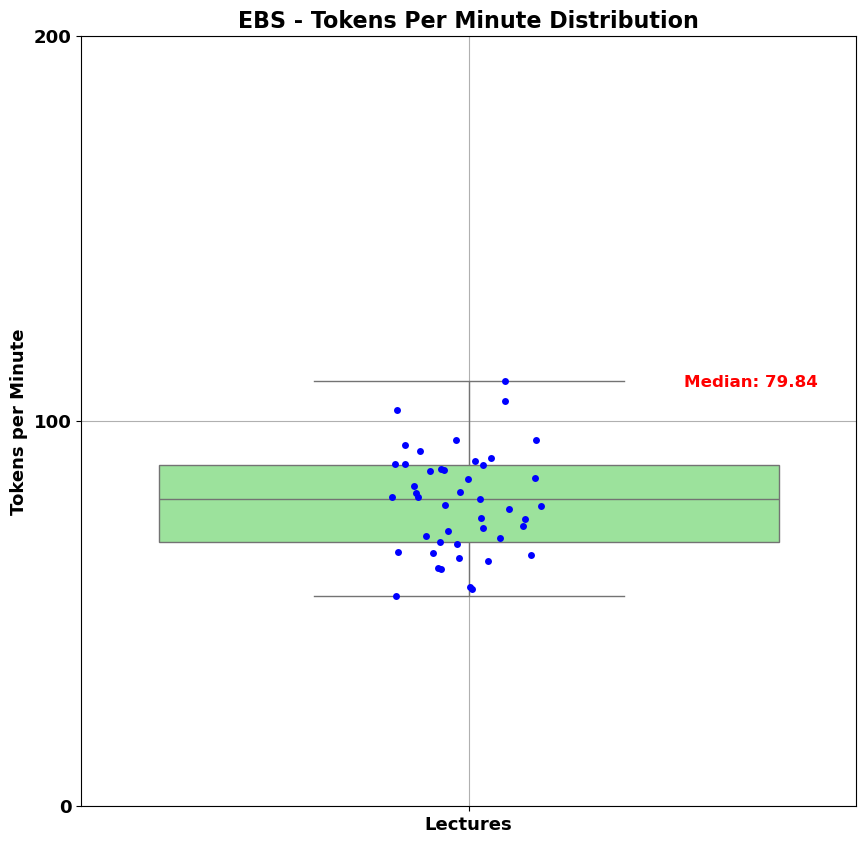

In [22]:
# 중앙값 계산
median = np.median(data)

# 박스플롯 및 스트립플롯 생성
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=data, orient='v', color='lightgreen')  # 세로 방향 박스플롯
sns.stripplot(data=data, orient='v', color='blue', jitter=True)  # 세로 방향 스트립플롯

plt.title('EBS - Tokens Per Minute Distribution', fontsize=16, fontweight='bold')
plt.xlabel('')  # x축에 'Lecture' 레이블 추가
plt.ylabel('Tokens per Minute', fontweight='bold', fontsize=13)  # y축에 'Tokens/Minute' 레이블 추가

# y축 스케일을 특정 값으로 설정
plt.yticks([0, 100, 200], fontweight='bold', fontsize=13)
plt.xticks([0], ['Lectures'], fontweight='bold', fontsize=13)  # 단일 데이터 세트이므로 x축에 하나의 레이블만 추가

# 중앙값을 오른쪽 가운데에 표시
plt.text(0.95, 0.55, f'Median: {median:.2f}', color='red', ha='right', va='center', 
         fontweight='bold', fontsize=12, transform=ax.transAxes, backgroundcolor='white')

plt.grid(True)
plt.show()